In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Paths to training and test directories
train_dir = r"D:\Archive\College\GitHub\semester-5\DL-lab\dog&cat\training_set"
test_dir = r"D:\Archive\College\GitHub\semester-5\DL-lab\dog&cat\test_set"

In [3]:
# Image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)  # Train and validation split

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # For training data
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # For validation data
)

# Test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Input layer
    MaxPooling2D(pool_size=(2, 2)),                                    # Pooling

    Conv2D(64, (3, 3), activation='relu'),                            # 2nd conv layer
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),                           # 3rd conv layer
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),                                                        # Flatten for dense layers
    Dense(128, activation='relu'),                                    # Fully connected layer
    Dropout(0.5),                                                     # Dropout for regularization
    Dense(1, activation='sigmoid')                                    # Output layer
])


d:\Archive\College\GitHub\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


d:\Archive\College\GitHub\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 154s 736ms/step - accuracy: 0.5326 - loss: 0.7039 - val_accuracy: 0.6000 - val_loss: 0.6606
Epoch 2/10
  1/200 ━━━━━━━━━━━━━━━━━━━━ 55s 278ms/step - accuracy: 0.6250 - loss: 0.6001

d:\Archive\College\GitHub\.venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6250 - loss: 0.6001 - val_accuracy: 0.6019 - val_loss: 0.6596
Epoch 3/10
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 67s 336ms/step - accuracy: 0.6654 - loss: 0.6135 - val_accuracy: 0.6956 - val_loss: 0.5678
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7500 - loss: 0.5657 - val_accuracy: 0.6906 - val_loss: 0.5708
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 61s 307ms/step - accuracy: 0.7148 - loss: 0.5596 - val_accuracy: 0.7262 - val_loss: 0.5293
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6875 - loss: 0.5578 - val_accuracy: 0.7306 - val_loss: 0.5349
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 62s 310ms/step - accuracy: 0.7724 - loss: 0.4806 - val_accuracy: 0.7519 - val_loss: 0.5027
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8125 - loss: 0.4181 - val_accuracy: 0.7631 - val_loss: 0.5039
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 61s 303ms/step - accuracy: 0.7845 - loss: 0.4418 - 

In [7]:
# Test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Found 2023 images belonging to 2 classes.
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 479ms/step - accuracy: 0.7616 - loss: 0.4928
Test Accuracy: 76.27%


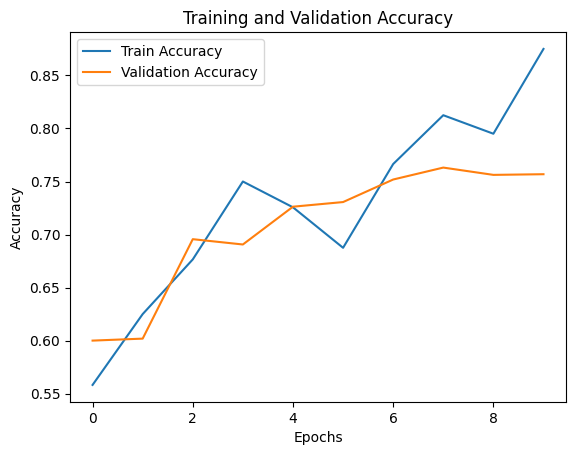

In [9]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()